In [5]:
import firebase_admin
from firebase_admin import credentials, firestore

cred = credentials.Certificate('isis3510-guarap-4a6039e186a6.json')
firebase_admin.initialize_app(cred)

collection_name = 'bugReports'

# Initialize Firestore
db = firestore.client()

# Get a reference to the collection
collection_ref = db.collection(collection_name)

# Get documents from the collection
docs = collection_ref.get()

# Count the number of documents
num_documents = len(docs)

# Print the number of documents
print(f'The number of documents in the collection {collection_name} is: {num_documents}')


The number of documents in the collection bugReports is: 47


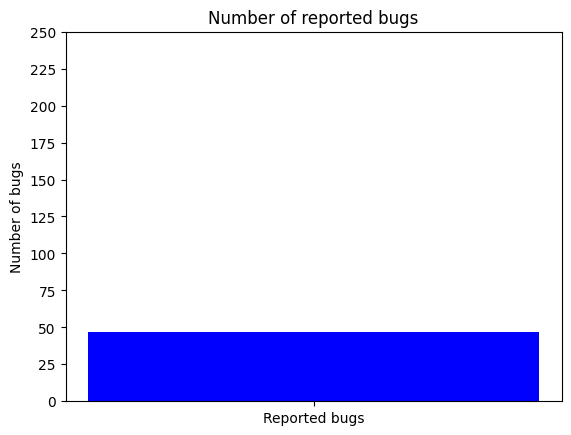

In [6]:
import matplotlib.pyplot as plt
# Plotting a bar graph
labels = ['Reported bugs']
values = [num_documents]

plt.bar(labels, values, color='blue')
plt.title('Number of reported bugs')
plt.ylabel('Number of bugs')
plt.yticks(range(0, 251, 25))
plt.show()

{'id_user_send': 'nathalia', 'id_user_post': 'juanbachatas', 'description': '      ', 'id_post': '294B228E-CB54-4CF5-8837-72F627CEF0A9'}
{'id_post': 'A07369A2-AB19-4A2E-991F-23AD9F8C71B7', 'id_user_send': 'nathalia', 'id_user_post': 'ta123', 'description': 'Mallll'}
{'id_user_send': 'estebanana', 'description': 'La vaca está mirando feo a los usuarios', 'id_user_post': 'juanbachatas', 'id_post': '42F29094-7347-42CA-87C0-32A9201F23E5'}
{'id_user_post': 'nathalia', 'id_user_send': 'nathalia', 'id_post': '8FF71531-93F9-49AE-BDA5-9FDF414F29D1', 'description': 'Reportada'}
{'description': 'Malo', 'id_post': '42F29094-7347-42CA-87C0-32A9201F23E5', 'id_user_send': 'nathalia', 'id_user_post': 'juanbachatas'}
juanbachatas: 3 times
ta123: 1 times
nathalia: 1 times


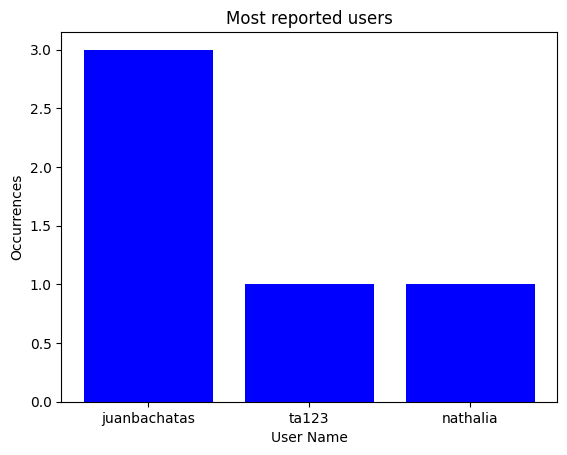

In [7]:
from collections import Counter


collection_name = 'postReports'

# Initialize Firestore
db = firestore.client()

# Get a reference to the collection
collection_ref = db.collection(collection_name)

# Get documents from the collection
docs = collection_ref.get()
# Extract user names from all documents
user_names = []
for doc in docs:
    data = doc.to_dict()
    print(data)
    if 'id_user_post' in data:
        user_names.append(data['id_user_post'])


# Count occurrences of each user name
user_name_counts = Counter(user_names)

# Print the counts
for user_name, count in user_name_counts.items():
    print(f'{user_name}: {count} times')

# Plotting a bar graph
labels = list(user_name_counts.keys())
values = list(user_name_counts.values())

plt.bar(labels, values, color='blue')
plt.title('Most reported users')
plt.xlabel('User Name')
plt.ylabel('Occurrences')
plt.show()

In [8]:
from transformers import pipeline
sent_analysis = pipeline('sentiment-analysis')


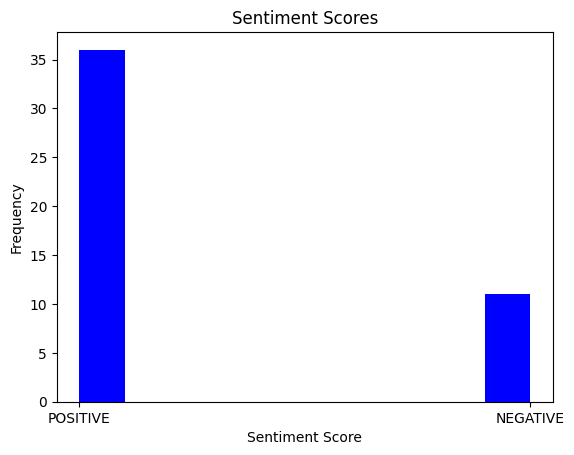

In [14]:

collection_name = 'bugReports'


# Get a reference to the collection
collection_ref = db.collection(collection_name)

# Get documents from the collection
docs = collection_ref.get()

# Extract bug reports from all documents
bug_reports = []
for doc in docs:
    data = doc.to_dict()
    if 'description' in data:
        bug_reports.append(data['description'])

# Get sentiment scores for each bug report
sentiment_scores = []
for bug_report in bug_reports:
    sentiment_scores.append(sent_analysis(bug_report)[0]['label'])

# Plotting a histogram
plt.hist(sentiment_scores, bins=10, color='blue')
plt.title('Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()
